<div class="alert alert-success">
    
## Практическое домашнее задание 2: 

  Линейная регрессия, scikit-learn, градиентный спуск

### Общая информация

Дата выдачи: 08.03.2023

Мягкий дедлайн: 23:59MSK 15.03.2023

Жесткий дедлайн: 23:59MSK 22.03.2023

**Материалы**

- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

Библиотека **Sklearn:**

sklearn.liner_model

linear_model:

- RidgeClassifier
- SGDClassifier
- SGDRegressor
- LinearRegression
- LogisticRegression
- Lasso
и т.д.

Документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

### О задании
В этом задании нужно будет проанализировать данные и выделить из них полезные признаки. И научитесь и закрепите знания с помощью реализации обучения линейной регрессии с помощью различных вариантов градиентного спуска.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Стоит обратить внимание**, что в каждом подразделе этого домашнего задания присутствуют не только задачи, но и вопросы. Вопросы расширяют задачи и ориентированы на интерпретируемость и обоснование вашего кода. Поэтому отвечать на них является обязательным условием. За отсутствие выводов и ответов на вопросы баллы могут быть снижены. Ну и в другом случае, если Вы, напротив, ответите на вопросы, но не напишете корректный код к соответствующим задачам, то баллы за такое выставляться не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы.

### Формат сдачи
Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате hw-practice-02-linregr-gd-Username.ipynb, где Username — ваша фамилия, лучше отправлять в телеграм @kronesine.  

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

# Задание 1. Подготовка данных (1 балл)

**Задание 1 (1.5 балла, включая ответы на вопросы)**. В данном разделе будем выделять признаки из такого датасета: [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview). 
Цель: предсказать длительность поездки на такси. 
Следует скачать обучающую выборку из этого соревнования и загрузить ее:

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv('train.csv')
X.head(4)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429

Важно: в данных имеются стоблцы `pickup_datetime` и `dropoff_datetime`. Колонку `dropoff_datetime` следует удалить, поскольку она была добавлена организаторами соревнования на `kaggle` только в обучающую выборку и ее, соотвественно, нельзя использовать. 

В колоноке `pickup_datetime` записаны дата и время начала поездки. Работа с таким типом данных стандартизирована из-за распространенности соответствующих признаков во многих датасетах (хотя подводные камни все же остаются).
В данном случае существует подход - нужно преобразовать данные в `datetime`-объекты.

In [3]:
X.drop(columns=['dropoff_datetime'], inplace=True)

In [4]:
X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Следует посмотреть на распределение таргета в обучающей выборке, например, нарисовать гистограмму этой колонки (используйте `plt.yscale('log')`).

И, после этого **ответьте на вопрос**: "Что можете сказать о целевой переменной по гистограмме её значений?:

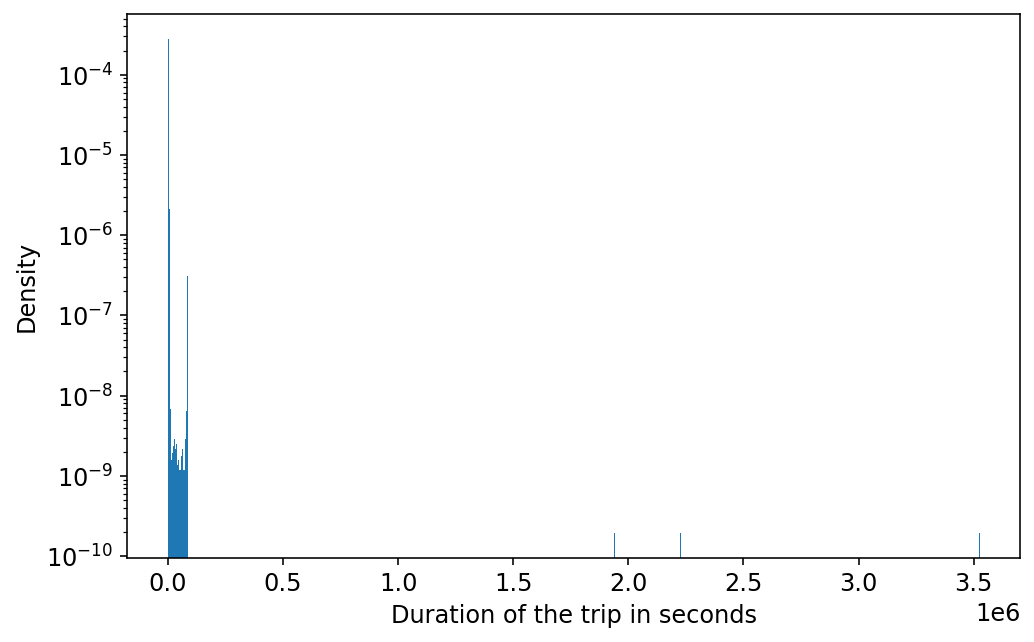

In [5]:
x = X['trip_duration'] # x содержит данные из всей обучающей выборки

plt.hist(x, density=True, bins=1000)  
plt.yscale('log')
plt.ylabel('Density')
plt.xlabel('Duration of the trip in seconds');

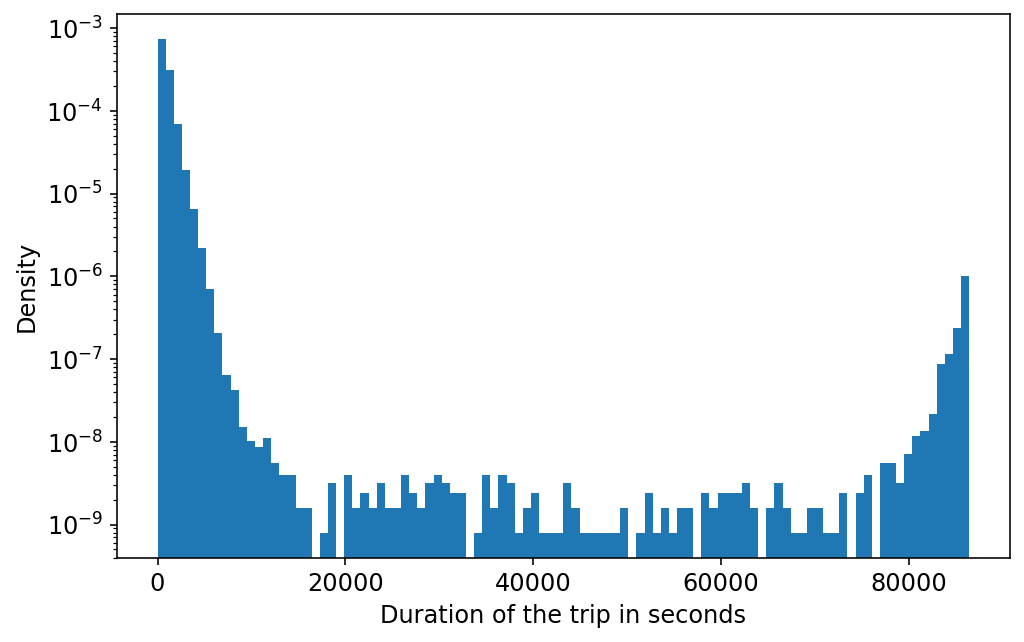

In [6]:
x_mod = X.trip_duration[X.trip_duration < 100_000] # x_mod содержит данные о поездках
                                                   # длительностью не более 100_000 секунд

plt.hist(x_mod, density=True, bins=100)  
plt.yscale('log')
plt.ylabel('Density')
plt.xlabel('Duration of the trip in seconds');

При решении данной задачи в качестве метрики качества использовалась RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему была выбрана в качестве метрики именно RMSLE, а не RMSE? (посмотрите внимательно на формулу и подумайте, почему она в данном конкретном случае, действительно будет являться подходящей метрикой)

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, а точнее сказать, модификации линейной регресии, и каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: Пусть есть $\hat{a}$, которая доставляет минимум функционалу RMSE. Применим преобразования    $a(x_i) = \exp(\hat{a}(x_i)) - 1$ и $y_i = \exp(\hat{y}_i)) - 1$. Они являются монотонными (то есть если $\hat{y}_k>\hat{y}_m$, то $y_k>y_m$,) и биективными. Поэтому полученное $a$ будет доставлять минимум соответствующему функционалу RMSLE. Обратно аналогично.

В итоге наша рассматриваемая задача оптимизации RMSLE была сведена к задаче оптимизации MSE, которую мы вполне умеем решать. Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [7]:
X['log_trip_duration'] = pd.DataFrame(np.log1p(X['trip_duration']))

X.drop(columns=['trip_duration'], inplace=True)

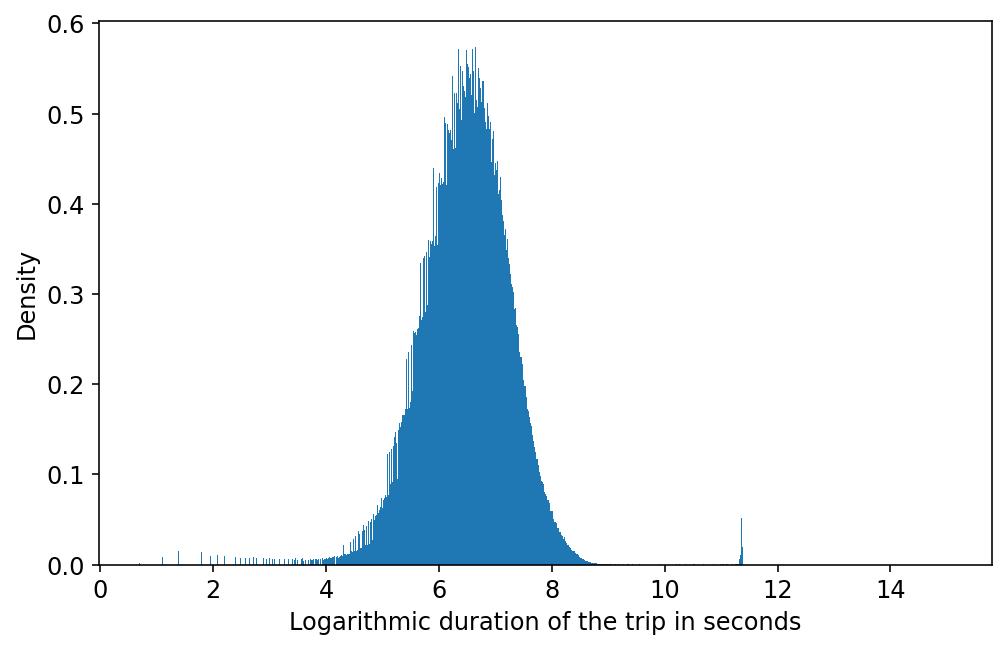

In [8]:
y = X['log_trip_duration'] 

plt.hist(y, density=True, bins=1000)  
plt.ylabel('Density')
plt.xlabel('Logarithmic duration of the trip in seconds');

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [9]:
from sklearn.metrics import mean_squared_error

best_constant = y.mean()

print("RMSE with best constant = %.4f" % mean_squared_error(y, best_constant * np.ones(len(y)),
                                                            squared=False))

RMSE with best constant = 0.7958


# Часть 1 

                        Выделение признаков, визуализация и работа с `pickup_datetime` (3 балла)

**Задание 2 (0.5 баллов)**. Первое с чего стоит начать и кажется самым логичным --- это посмотреть, сколько всего было поездок в каждый из дней. Для этого Вам следует построить график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [10]:
z = pd.DataFrame({'day_of_year': X['pickup_datetime'].dt.day_of_year,
                 'day_of_week': X['pickup_datetime'].dt.day_of_week,
                 'hour': X['pickup_datetime'].dt.hour,
                 'month': X['pickup_datetime'].dt.month})

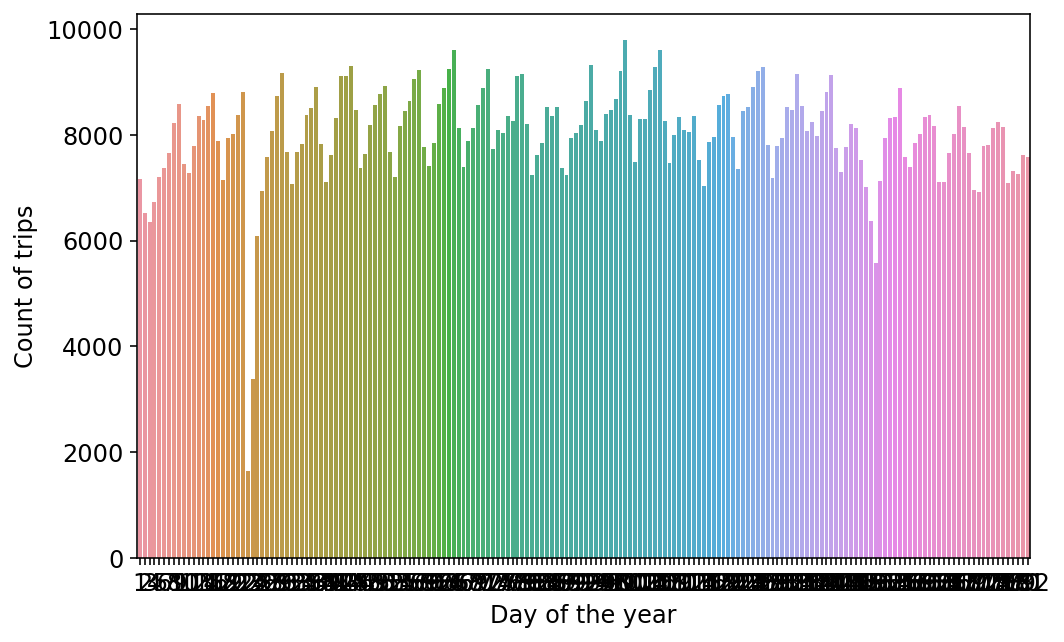

In [11]:
sns.countplot(x=z['day_of_year'])
plt.xlabel('Day of the year') 
plt.ylabel('Count of trips')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

In [12]:
z.value_counts(subset='day_of_year') < 6300

day_of_year
100    False
107    False
65     False
93     False
44     False
       ...  
3      False
25      True
151     True
24      True
23      True
Length: 182, dtype: bool

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

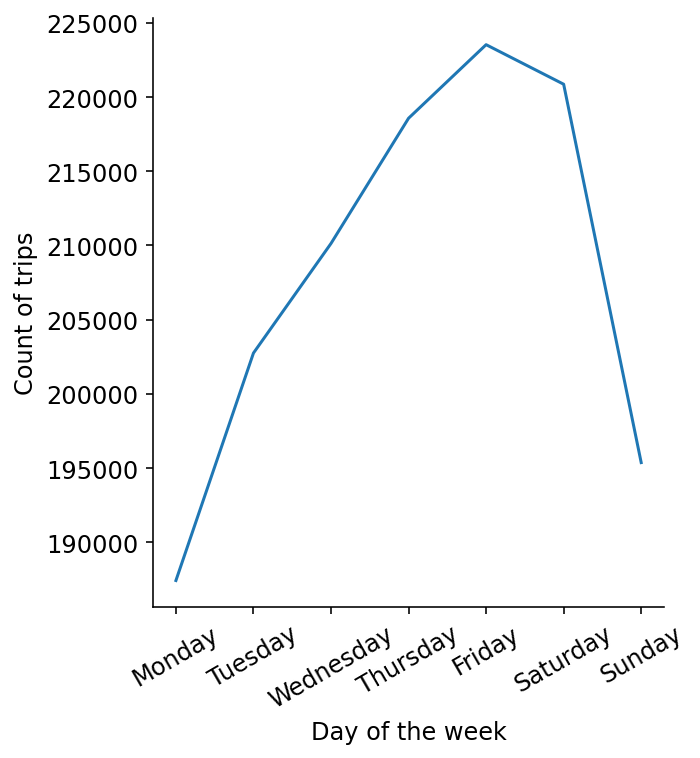

In [13]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.relplot(x=days, y=z.value_counts(subset='day_of_week', sort=False), kind='line')
plt.xticks(rotation=30)
plt.xlabel('Day of the week') 
plt.ylabel('Count of trips')
plt.show()

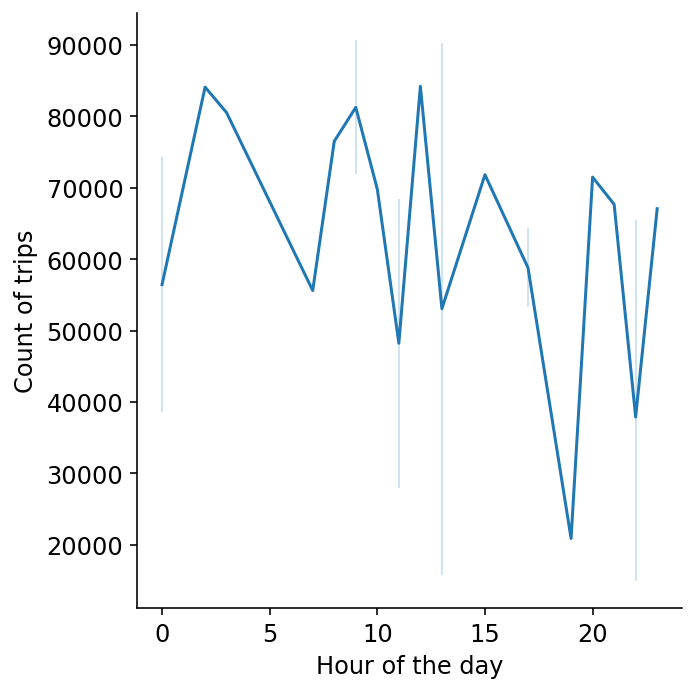

In [14]:
sns.relplot(x=z['hour'], y = z.value_counts(subset='hour', sort=False), kind='line')
plt.xlabel('Hour of the day') 
plt.ylabel('Count of trips')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

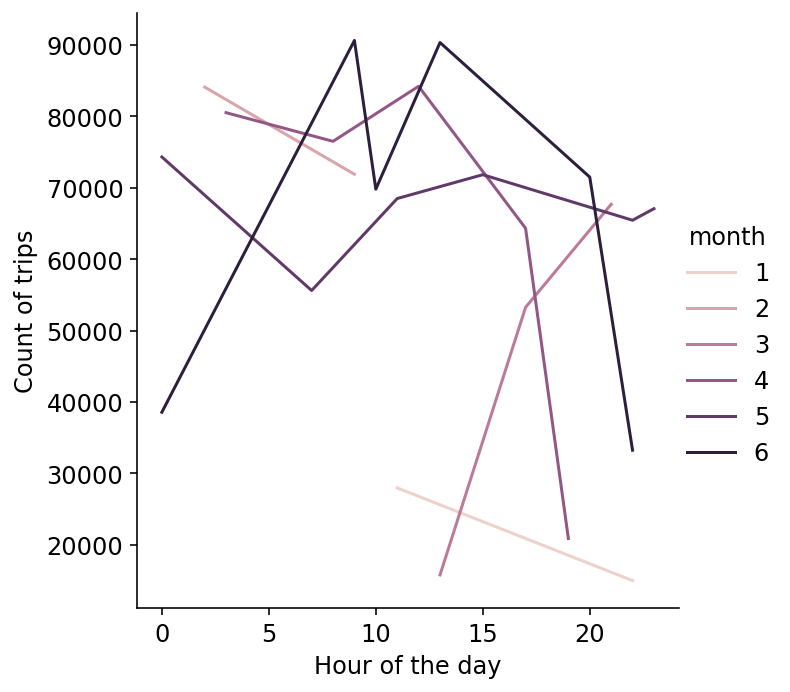

In [15]:
sns.relplot(x='hour', y = z.value_counts(subset='hour', sort=False), hue='month', data=z, kind='line')
plt.xlabel('Hour of the day')
plt.ylabel('Count of trips')
plt.show()

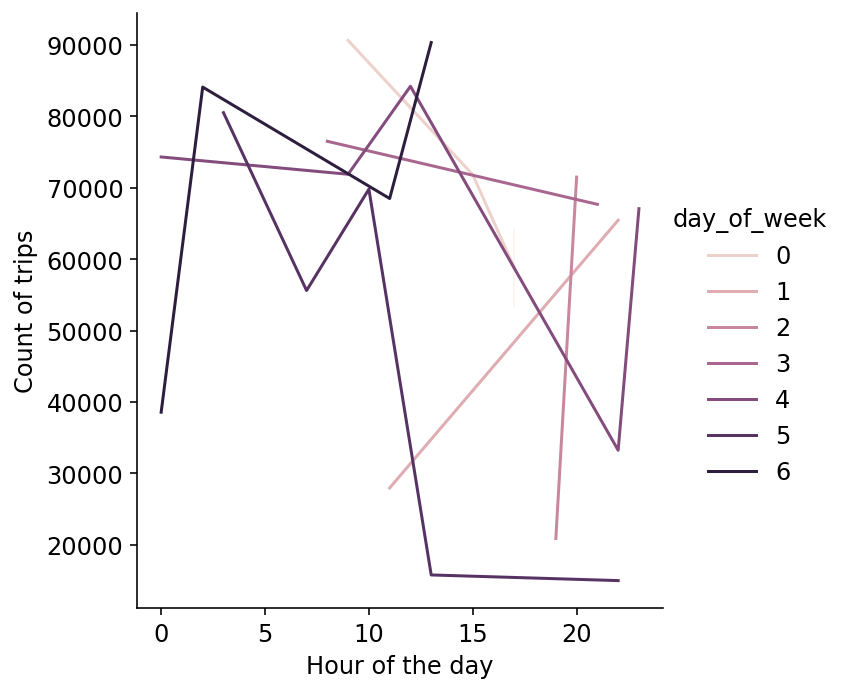

In [16]:
sns.relplot(x='hour', y = z.value_counts(subset='hour', sort=False), hue='day_of_week', data=z, kind='line')
plt.xlabel('Hour of the day')
plt.ylabel('Count of trips')
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
Xx = X.drop(columns=['log_trip_duration'])
y = X['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.3, random_state=42)

In [19]:
y_train

1011257    6.739337
178550     6.909753
551460     6.955593
1434271    6.665684
1173610    6.597146
             ...   
259178     7.156177
1414414    6.726233
131932     7.159292
671155     5.966147
121958     7.359468
Name: log_trip_duration, Length: 1021050, dtype: float64

In [20]:
X_plus_y = X_train
X_plus_y['log_trip_duration'] = y_train

In [21]:
groups_dict = X_plus_y.groupby(by=X_plus_y['pickup_datetime'].dt.day_of_week).groups
mean_durations = []

for key in list(groups_dict.keys()):
    mean_durations.append(np.mean(X_plus_y['log_trip_duration'][groups_dict[key]]))

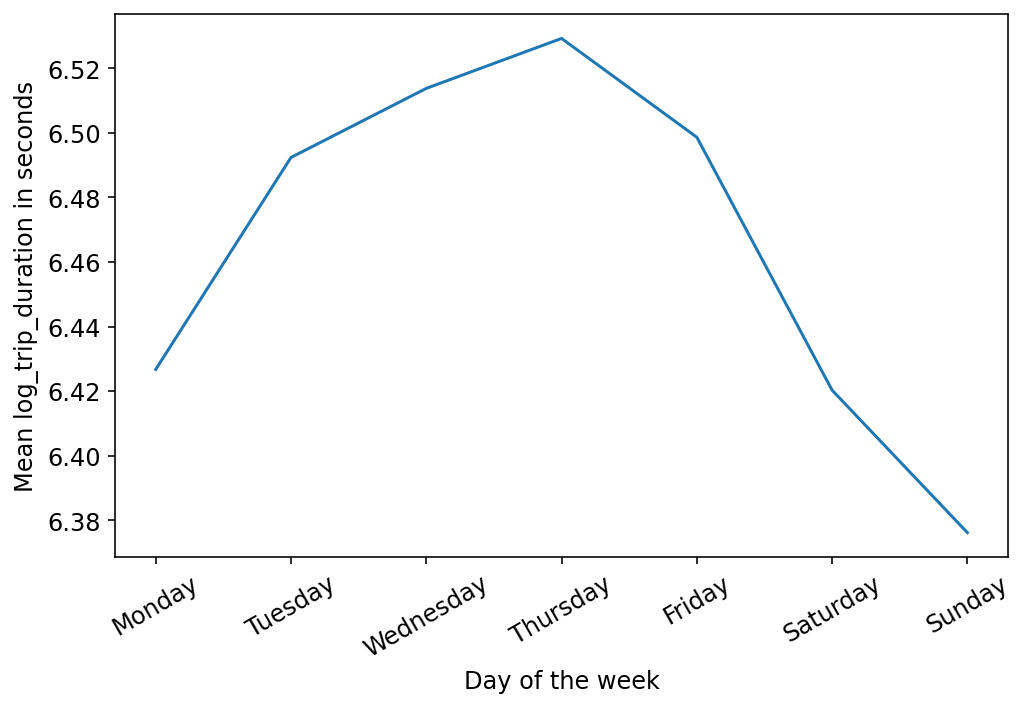

In [22]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.plot(days, mean_durations)
plt.xticks(rotation=30)
plt.xlabel('Day of the week') 
plt.ylabel('Mean log_trip_duration in seconds')
plt.show()

In [23]:
groups_dict = X_plus_y.groupby(by=X_plus_y['pickup_datetime'].dt.hour).groups
mean_durations = []
hours = list(groups_dict.keys())

for hour in hours:
    mean_durations.append(np.mean(X_plus_y['log_trip_duration'][groups_dict[hour]]))

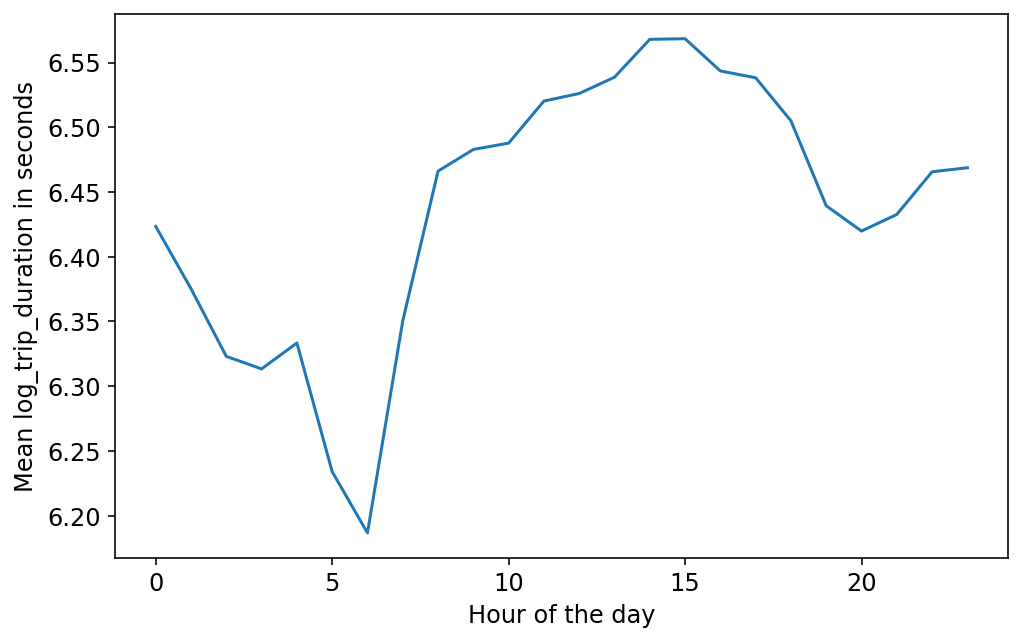

In [24]:
plt.plot(hours, mean_durations)
plt.xlabel('Hour of the day') 
plt.ylabel('Mean log_trip_duration in seconds')
plt.show()

In [25]:
groups_dict = X_plus_y.groupby(by=X_plus_y['pickup_datetime'].dt.day_of_year).groups
mean_durations = []
days = list(groups_dict.keys())

for day in days:
    mean_durations.append(np.mean(X_plus_y['log_trip_duration'][groups_dict[day]]))

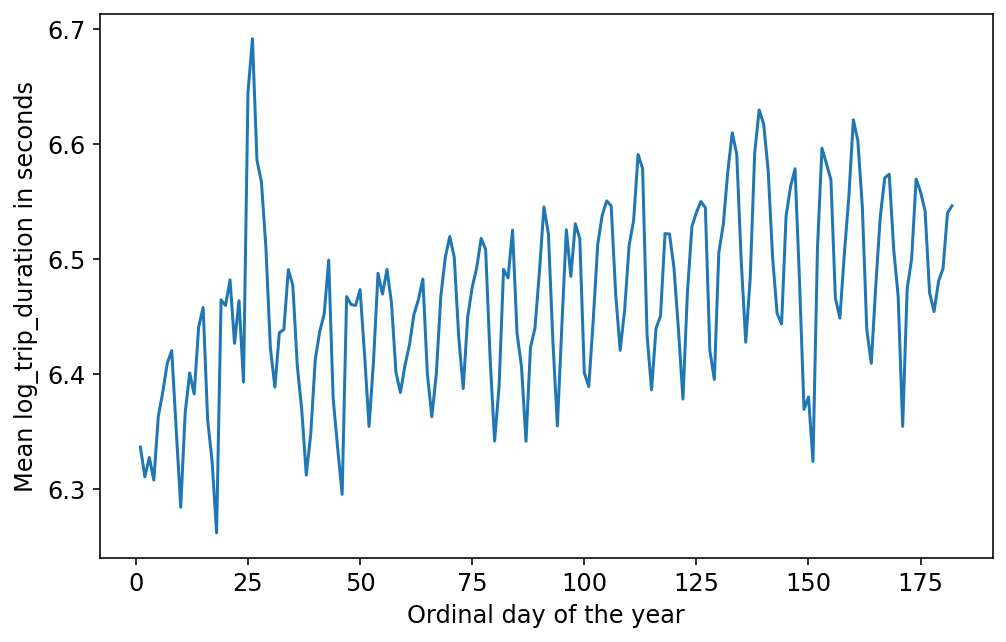

In [26]:
plt.plot(days, mean_durations)
plt.xlabel('Ordinal day of the year') 
plt.ylabel('Mean log_trip_duration in seconds')
plt.show()

**Вопрос (0.5 баллов)**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [27]:
X_train['day_of_week'] = X_train['pickup_datetime'].dt.day_of_week
X_train['month'] = X_train['pickup_datetime'].dt.month
X_train['hour'] = X_train['pickup_datetime'].dt.hour
X_train['day_of_year'] = X_train['pickup_datetime'].dt.day_of_year

X_train['is_anomaly_1'] = [0] * X_train.shape[0]
a = (X_train['day_of_year'] >= 23) 
b = (X_train['day_of_year'] <= 25)
c = a.astype(int) * b.astype(int)
X_train['is_anomaly_1'].loc[c == 1] = [1] * len(X_train['is_anomaly_1'].loc[c == 1])

X_train['is_anomaly_2'] = [0] * X_train.shape[0]
d = (X_train['day_of_year'] == 151)
X_train['is_anomaly_2'].loc[d.astype(int) == 1] = [1] * len(X_train['is_anomaly_2'].loc[d.astype(int) == 1])

/home/aya/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
X_test['day_of_week'] = X_test['pickup_datetime'].dt.day_of_week
X_test['month'] = X_test['pickup_datetime'].dt.month
X_test['hour'] = X_test['pickup_datetime'].dt.hour
X_test['day_of_year'] = X_test['pickup_datetime'].dt.day_of_year

X_test['is_anomaly_1'] = [0] * X_test.shape[0]
a = (X_test['day_of_year'] >= 23) 
b = (X_test['day_of_year'] <= 25)
c = a.astype(int) * b.astype(int)
X_test['is_anomaly_1'].loc[c == 1] = [1] * len(X_test['is_anomaly_1'].loc[c == 1])

X_test['is_anomaly_2'] = [0] * X_test.shape[0]
d = (X_test['day_of_year'] == 151)
X_test['is_anomaly_2'].loc[d.astype(int) == 1] = [1] * len(X_test['is_anomaly_2'].loc[d.astype(int) == 1])

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Задание 5 (1 балл)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

features = ['day_of_week', 'month', 'hour', 'is_anomaly_1', 'day_of_year', 'is_anomaly_2']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.7931
Train RMSE = 0.7941


# Часть 2 
### Введение

Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации. 

В этом разделе вам предстоит реализовать две различных вариации градиентного спуска и написать свою реализацию линейной регресии.

## Задание 1. Реализация градиентного спуска (4.5 балла)

Напишите собственные реализации различных подходов к градиентному спуску, опираясь на подготовленные шаблоны в файле `template_1.py`. **Стоит обратить внимание**, что все реализуемые методы должны быть векторизованы.

##### Небольшое отступление:

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. 

Более формальная запись: 

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Задание 1.1.1 Градиент MSE в матричном виде (0.5 балла).

На семинаре мы обсуждали дифференцирование функции потерь MSE в матричном виде.

Функция потерь MSE записывается в матричном виде так:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в свой конспект при наличии) градиент для функции потерь MSE в матричном виде

**Ответ:** $-\dfrac{2}{\ell}(y-Xw)^TX$ (или тот же столбец, но транспонированный).

### Задание 1.1.2 Вывести аналогично для Ridge-регрессии в матричном виде (1.5 балл)

$$
    Q(w) + \lambda * R(w) {,~где~} R(w) = ||w||^2_2
$$

**Решение**:
$$\dfrac{\partial \left(Q(w) + \lambda * R(w)\right)}{\partial w} = \dfrac{\partial (Q(w))}{\partial w} + \lambda * \dfrac{\partial (R(w))}{\partial w} \ \boxed{=}$$
$$\dfrac{\partial (R(w))}{\partial w} = \dfrac{\partial(w^T w)}{\partial w} = \dfrac{\partial(w^T)}{\partial w} * w + \dfrac{\partial(w)}{\partial w} * w^T = 2w^T$$
Тогда $$\boxed{=} \ -\dfrac{2}{\ell}(y-Xw)^TX + 2 \lambda w^T.$$

### Задание 1.2. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.3. Полный градиентный спуск VanillaGradientDescent (1 балл).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descent.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

##### Небольшое отступление:

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Если у нас будет размер выборки большим, то тогда это процесс становится очень трудоёмким. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.4. Стохастический градиентный спуск StochasticDescent (1 балл)

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$ w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}) $$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

## Задание 2. Реализация линейной регресии (1.5 балл)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [30]:
%load_ext autoreload

In [31]:
%autoreload 2

import numpy as np

from descents import get_descent, LossFunction
from linear_regression import LinearRegression

In [32]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [33]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [34]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Творческий Бонус (0.5)

Наступило прекрасное время года - весна! Учиться - это, конечно, хорошо, но важно не забывать отдыхать, посвящать время себе и близким. Выберете рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека этим блюдом. Кратко опишите ваши впечатления, прикрепите рецепт, фотографии блюда и довольного гостя.

`### ваш кулинарный опыт здесь ###`

## Оценка работы 

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ